# 1. Klassifikation mit SVMs

In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%load_ext version_information

a) Laden Sie, wie im Tutorium beschrieben, den berühmten MNIST-Datensatz mit eingescannten handgeschriebenen Ziffern mit der Funktion digits = load_digits(). Grundlegende Informationen zum Datensatz erhalten Sie durch Ausgabe des Attributes digits.DESCR. Die Merkmalsvektoren (hier Bilder) sind die Zeilen der Designmatrix digits.data, die zugehörigen Labels stehen in dem Vektor digits.target. Wie in Arbeitsblatt 1 gelernt, finden Sie heraus, wieviele und welche Labels und wieviele Daten es gibt, und welche Dimension diese haben. Stellen Sie eine Zufallsauswahl von 10 Bildern (zusammen mit der Klassenzugehörigkeit) in Ihrem Notebook dar.

Anzahl der Datenpunkte: 1797
Anzahl der Merkmale: 64
Klassenzugehörigkeiten: [0 1 2 3 4 5 6 7 8 9]
Dimension der Datenmatrix: (1797, 64)


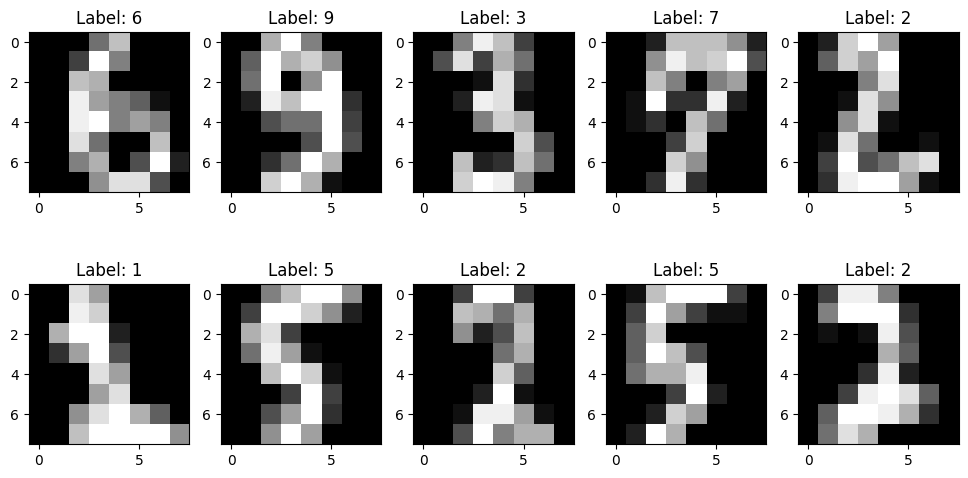

In [2]:
digits = datasets.load_digits()

# Grundlegende Informationen zum Datensatz
print("Anzahl der Datenpunkte:", len(digits.data))
print("Anzahl der Merkmale:", len(digits.feature_names))
print("Klassenzugehörigkeiten:", np.unique(digits.target))
print("Dimension der Datenmatrix:", digits.data.shape)

# Bestimme die Größe der Bilder basierend auf der Anzahl der Merkmale
num_features = len(digits.feature_names)
image_size = int(np.sqrt(num_features))  # Annahme: quadratische Bilder

# Zufallsauswahl von 10 Bildern
np.random.seed(42)  # Fuer die Reproduzierbarkeit der Ergebnisse
random_indices = np.random.choice(len(digits.data), 10, replace=False)

# Darstellung der ausgewaehlten Bilder
plt.figure(figsize=(12, 6))
for i, index in enumerate(random_indices, 1):
    plt.subplot(2, 5, i)
    plt.imshow(np.reshape(digits.data[index], (image_size, image_size)), cmap='gray')  # Bilder sind 8x8
    plt.title(f"Label: {digits.target[index]}")

plt.show()

b) Teilen Sie den Datensatz zufällig in einen nichtüberlappenden Trainings- und Testdatensatz auf, so dass ein Viertel der Daten zu Testdaten werden. Dies geschieht am Einfachsten mit der Funktion sklearn.model_selection.train_test_split(). Trainieren Sie einen Supportvektor-Klassifikator (Standard in Scikit Learn ist eine 1-Norm Soft Margin SVM, bei Mehrklassenproblemen wird automatisch ein Satz von one-vs.-one-Klassifikatoren erstellt) mit einem RBF-Kern mit und einem Parameter . Bestimmen Sie den Anteil korrekt klassifizierter Beispiele (Korrektklassifikationsrate, Treffergenauigkeit, engl. Accuracy) im Trainings- und Testdatensatz mithilfe der Funktion SVC.score(). Underfitting liegt vor, wenn Ihr Klassifikator auf den Trainingsdatensatz eine Treffergenauigkeit von deutlich unter 100% erzielt, bei Overfitting liegt die Treffergenauigkeit auf dem Testdatensatz deutlich unter der auf dem Trainingsdatensatz. Welcher Fall liegt hier vor?

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

def train_test_svm(test_size, C, gamma):
    # Aufteilen des Datensatzes
    X_train, X_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size=test_size, random_state=42)

    # Trainieren des Supportvektor-Klassifikators mit RBF-Kern
    svm_classifier = SVC(kernel='rbf', C=C, gamma=gamma)  
    svm_classifier.fit(X_train, y_train)

    # Berechnung der Treffergenauigkeit auf den Trainings- und Testdatensaetzen
    train_accuracy = svm_classifier.score(X_train, y_train)
    test_accuracy = svm_classifier.score(X_test, y_test)

    return train_accuracy, test_accuracy

# Beispielaufruf der Funktion
train_acc, test_acc = train_test_svm(0.25, 1.0, 'scale')
print(f'Treffergenauigkeit auf Trainingsdatensatz: {train_acc:.6f}')
print(f'Treffergenauigkeit auf Testdatensatz: {test_acc:.6f}')

Treffergenauigkeit auf Trainingsdatensatz: 0.996288
Treffergenauigkeit auf Testdatensatz: 0.986667


Probieren Sie alternativ die SVM-Parameter und und vergleichen Sie.

In [4]:
C_values = [0.1, 1.0, 10.0, 100.0, 1000.0]
gamma_values = [0.001, 0.01, 0.1] #, 'scale', 'auto'
result = []

for C_value in C_values:
    for gamma_value in gamma_values:
        train_acc, test_acc = train_test_svm(0.25, C_value, gamma_value)
        result.append({'C': C_value, 'gamma': gamma_value, 'train_accuracy': train_acc, 'test_accuracy': test_acc});

df = pd.DataFrame(result)
display(df)

,C,gamma,train_accuracy,test_accuracy
0,0.1,0.001,0.970304,0.964444
1,0.1,0.010,0.107647,0.082222
2,0.1,0.100,0.107647,0.082222
3,1.0,0.001,0.997773,0.988889
4,1.0,0.010,1.000000,0.764444
5,1.0,0.100,1.000000,0.082222
6,10.0,0.001,1.000000,0.991111
7,10.0,0.010,1.000000,0.793333
8,10.0,0.100,1.000000,0.082222
9,100.0,0.001,1.000000,0.991111


Wiederholen Sie das Experiment für einen anderen Zufallssplit in Trainings- und Testdatensatz. Wie stark hängt Ihr Ergebnis von der zufälligen Teilung in Trainings- und Testdatensatz ab?

In [5]:
test_sizes = [0.1, 0.25, 0.5, 0.75, 0.9]
result_test = []

for test_size in test_sizes:
    for C_value in C_values:
        for gamma_value in gamma_values:
            train_acc, test_acc = train_test_svm(test_size, C_value, gamma_value)
            result_test.append({'test_size': test_size, 'C': C_value, 'gamma': gamma_value, 'train_accuracy': train_acc, 'test_accuracy': test_acc});

df = pd.DataFrame(result_test)
display(df)

,test_size,C,gamma,train_accuracy,test_accuracy
0,0.1,0.1,0.001,0.977118,0.977778
1,0.1,0.1,0.010,0.105751,0.061111
2,0.1,0.1,0.100,0.105751,0.061111
3,0.1,1.0,0.001,0.998763,0.983333
4,0.1,1.0,0.010,1.000000,0.750000
...,...,...,...,...,...
70,0.9,100.0,0.010,1.000000,0.270705
71,0.9,100.0,0.100,1.000000,0.094561
72,0.9,1000.0,0.001,1.000000,0.942522
73,0.9,1000.0,0.010,1.000000,0.270705


In [6]:
%version_information

Software versions
Python 3.12.0 64bit [MSC v.1935 64 bit (AMD64)]
IPython 8.16.1
OS Windows 10 10.0.19045 SP0
Wed Nov 22 17:25:32 2023 Mitteleuropäische Zeit